In [36]:
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch  # type: ignore

from IPython.display import display
from numpy import ndarray
from pandas.core.frame import DataFrame
from plotly.graph_objs._figure import Figure
from skimpy import skim  # type: ignore
from sklearn.cluster import AgglomerativeClustering
from typing import Dict

In [2]:
df: DataFrame = pd.read_csv('Mall_Customers.csv')

display(df.head())
skim(df)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID               │   0 │     0 │  100.5 │  57.88 │   1 │  50.75 │  100.5 │  150.2 │   200 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │   0 │     0 │  38.85 │  13.97 │  18 │  28.75 │     36 │     49 │    70 │ ▆▇▅▅▃▂ │  │
│ │ Annual Income (k$)       │   0 │     0 │  60.56 │  26.26 │  15 │   41.5 │   61.5 │     78 │   137 │ ▅▇▇▅▂▁ │  │
│ │ Spending Score (1-100)   │   0 │     0 │   50.2 │  25.82 │   1 │  34.75 │     50 │     73 │    99 │ ▅▃▇▇▅▅ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴─────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Genre                     │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
X: DataFrame = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Dendrogram to find the optimal number of cluster

Text(0, 0.5, 'Euclidean distances')

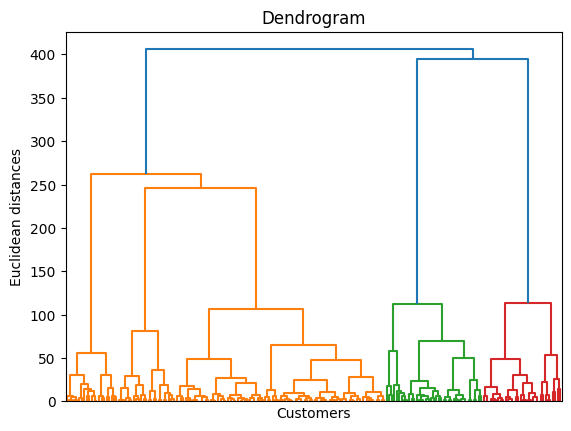

In [25]:
Z: ndarray = sch.linkage(X, method='ward', metric='euclidean')
dendrogram: Dict = sch.dendrogram(Z, no_labels=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [11]:
fig: Figure = ff.create_dendrogram(X)
fig.update_layout(width=1600, height=1600)
fig.update_xaxes(tickangle=90, tickfont=dict(family="Droid Sans Mono", size=8, weight="bold"))
fig.show()

In [41]:
hc: AgglomerativeClustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

df['Cluster'] = hc.fit_predict(X)
df['Cluster'] = 'Cluster_' + df['Cluster'].astype(str)

fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', title='Clusters of customers')
fig.show()

In [42]:
hc: AgglomerativeClustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

df['Cluster'] = hc.fit_predict(X)
df['Cluster'] = 'Cluster_' + df['Cluster'].astype(str)

fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', title='Clusters of customers')
fig.show()